In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
data = pd.read_csv(r"D:\Data\Deep_Learning\demo_data\5.outlier.csv", header=None)

In [4]:
data.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [5]:
data.shape
data.info()

(600, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [6]:
data.duplicated().value_counts()

False    600
dtype: int64

In [7]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

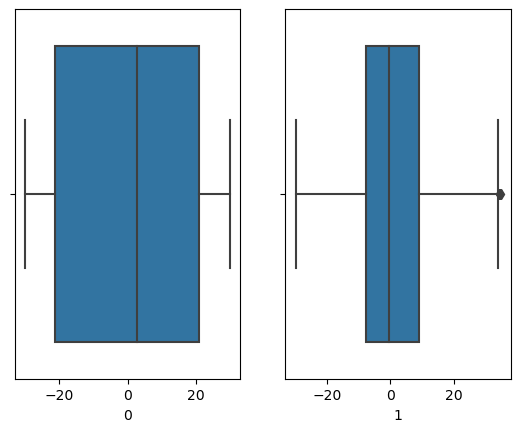

In [8]:
plt.subplot(121)
sns.boxplot(x=data[0])
plt.subplot(122)
sns.boxplot(x=data[1]);

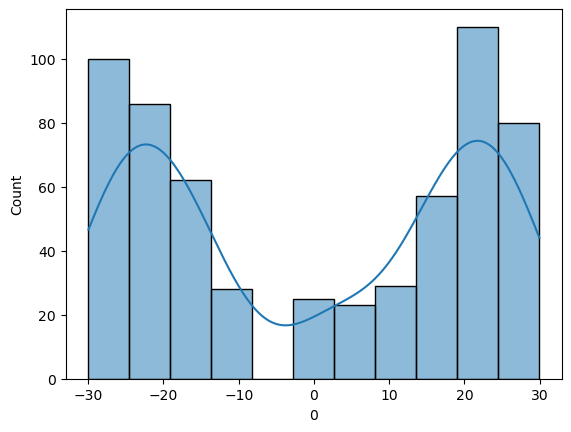

In [9]:
sns.histplot(data[0], kde=True);

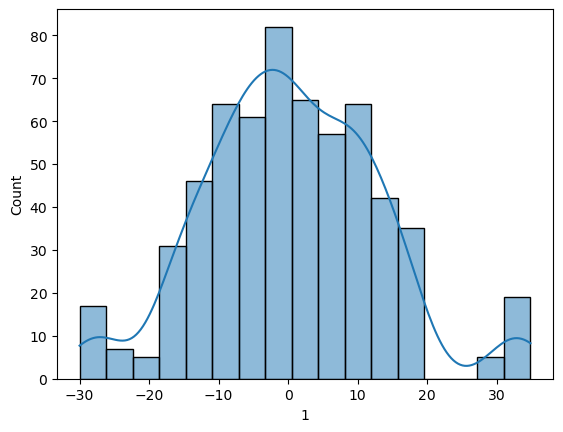

In [10]:
sns.histplot(data[1],kde=True);

In [11]:
data[2].value_counts()

0    300
1    300
Name: 2, dtype: int64

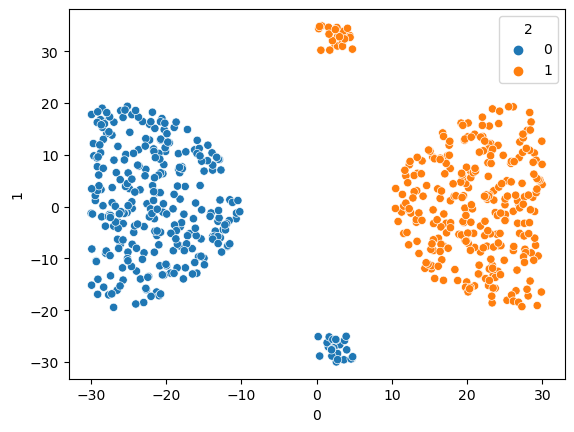

In [12]:
sns.scatterplot(x=data[0], y=data[1], hue=data[2]);

## Splitting the data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[[0,1]],data[2],test_size=0.1)

### Rescaling the features

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [15]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Buliding the model using sigmoid

In [16]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim = 2))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.get_weights()

[array([[-0.573148  ,  0.62672114, -0.6530497 , -0.64886   ],
        [-0.18376374, -0.77126694, -0.72088265,  0.6781962 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.7801429 , -0.6020589 ,  0.84585106],
        [-0.10732001,  0.07887864,  0.54032636],
        [-0.8740084 ,  0.254624  ,  0.18930483],
        [-0.3248005 ,  0.12278783, -0.68660015]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 1.0707216 , -0.36908835],
        [-1.0584451 , -0.16951215],
        [-0.08758378,  0.87079096]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.5162824],
        [ 1.195583 ]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='SGD',loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 2s 10ms/step - loss: 0.7128 - accuracy: 0.5255 - val_loss: 0.7464 - val_accuracy: 0.4352
Epoch 2/50
44/44 [==============================] - 0s 8ms/step - loss: 0.7076 - accuracy: 0.5255 - val_loss: 0.7391 - val_accuracy: 0.4352
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5255 - val_loss: 0.7323 - val_accuracy: 0.4352
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 0.7027 - accuracy: 0.5255 - val_loss: 0.7263 - val_accuracy: 0.4352
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.5255 - val_loss: 0.7232 - val_accuracy: 0.4352
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.5255 - val_loss: 0.7201 - val_accuracy: 0.4352
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.5255 - val_loss: 0.7183 - val_accuracy: 0.4352
Epoch 8/50
44/44 [=

In [21]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 2ms/step


array([[0.53233266],
       [0.53101456],
       [0.52302206],
       [0.5259307 ],
       [0.53342444],
       [0.5285274 ],
       [0.52953446],
       [0.534236  ],
       [0.52961403],
       [0.5275846 ],
       [0.5326621 ],
       [0.53248215],
       [0.5311171 ],
       [0.52710295],
       [0.53113484],
       [0.5332014 ],
       [0.53229195],
       [0.5163413 ],
       [0.52554554],
       [0.5163485 ],
       [0.5262741 ],
       [0.52365977],
       [0.527364  ],
       [0.53206855],
       [0.5323733 ],
       [0.525837  ],
       [0.5384584 ],
       [0.53494763],
       [0.53494465],
       [0.52946705],
       [0.52758926],
       [0.5272911 ],
       [0.5167113 ],
       [0.52465516],
       [0.52475923],
       [0.5163248 ],
       [0.5311777 ],
       [0.52809197],
       [0.52864105],
       [0.5307243 ],
       [0.5297714 ],
       [0.53550094],
       [0.5302625 ],
       [0.5313287 ],
       [0.5277823 ],
       [0.5350429 ],
       [0.53232014],
       [0.535

In [22]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.43333333333333335

In [24]:
val_loss = history.history['val_loss']
loss = history.history['loss']

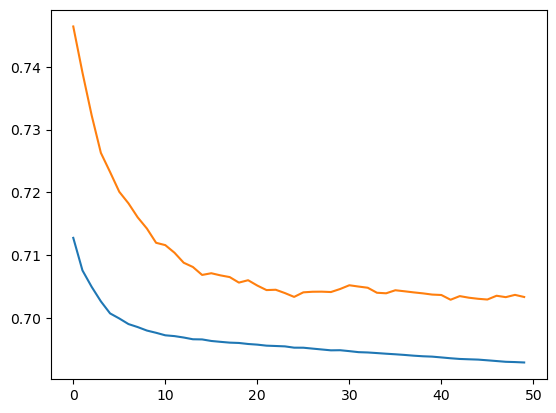

In [25]:
plt.plot(loss)
plt.plot(val_loss)

In [26]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 12s 1ms/step


<AxesSubplot: >

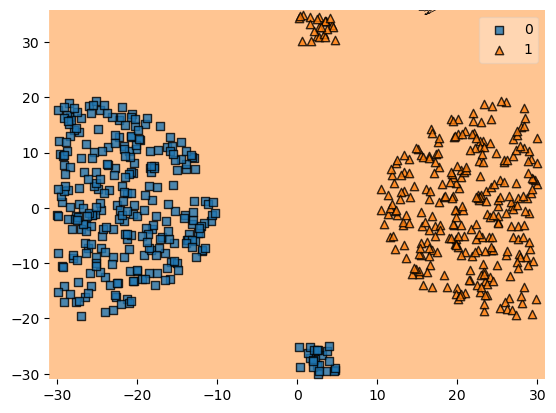

In [27]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 11s 1ms/step


<AxesSubplot: >

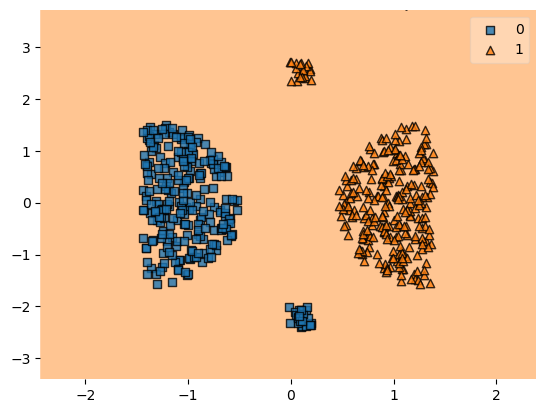

In [28]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 9s 958us/step


<AxesSubplot: >

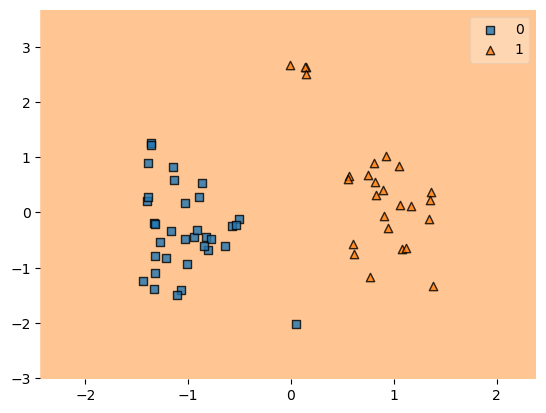

In [29]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the tanh activation func

In [30]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim = 2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [31]:
model.get_weights()

[array([[-0.6111835 ,  0.88727367,  0.04647577],
        [ 0.7613139 ,  0.12932992, -0.14707726]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.8705896 , -0.15891999],
        [-1.0622501 ,  0.553125  ],
        [ 0.13240027, -0.32691002]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.4601677],
        [ 0.7170409]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 0.4209 - accuracy: 0.7222 - val_loss: 0.2857 - val_accuracy: 0.8611
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.9213 - val_loss: 0.2022 - val_accuracy: 0.9722
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9977 - val_loss: 0.1526 - val_accuracy: 1.0000
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 1.0000 - val_loss: 0.1216 - val_accuracy: 1.0000
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1272 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 1.0000
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 1.0000
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 1.0000
Epoch 8/50
44/44 [==

In [35]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 2ms/step


array([[-0.89094067],
       [-0.90132505],
       [-0.8450842 ],
       [-0.68674046],
       [-0.93213016],
       [ 0.9926529 ],
       [-0.39280832],
       [-0.9536249 ],
       [ 0.99206257],
       [ 0.99221355],
       [-0.9415685 ],
       [ 0.99191606],
       [-0.9164796 ],
       [ 0.9924683 ],
       [-0.8735293 ],
       [ 0.9867902 ],
       [ 0.98784965],
       [ 0.9916616 ],
       [ 0.99140745],
       [ 0.9916533 ],
       [ 0.9923664 ],
       [ 0.9928762 ],
       [ 0.9931438 ],
       [-0.81757224],
       [ 0.9920577 ],
       [ 0.9912913 ],
       [-0.345079  ],
       [ 0.99190706],
       [ 0.9872858 ],
       [-0.9323232 ],
       [-0.92410195],
       [-0.79262847],
       [ 0.9915606 ],
       [-0.8200197 ],
       [ 0.9929901 ],
       [ 0.9906595 ],
       [-0.9381938 ],
       [ 0.99308544],
       [ 0.99282837],
       [ 0.9919243 ],
       [ 0.99291646],
       [-0.94509447],
       [-0.92477846],
       [-0.8635234 ],
       [-0.8676005 ],
       [-0

In [36]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

1.0

In [38]:
val_loss = history.history['val_loss']
loss = history.history['loss']

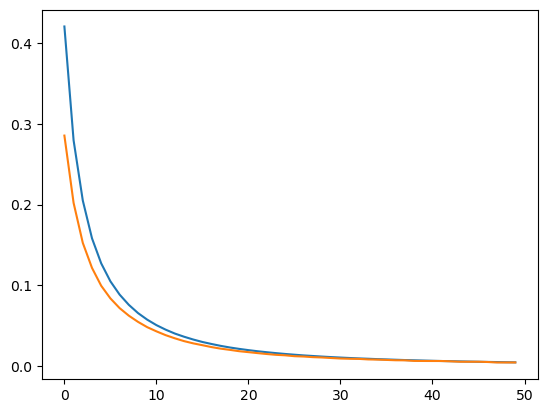

In [39]:
plt.plot(loss)
plt.plot(val_loss)

In [40]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 8s 858us/step


<AxesSubplot: >

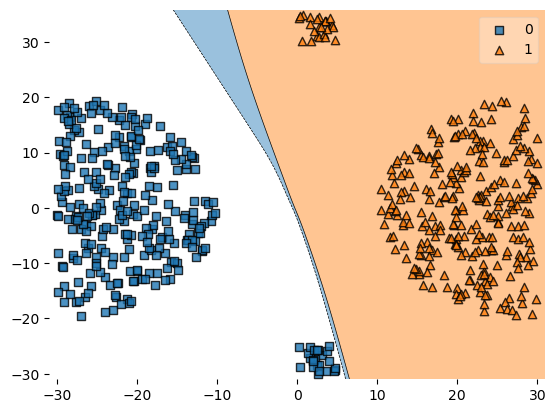

In [41]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 11s 1ms/step


<AxesSubplot: >

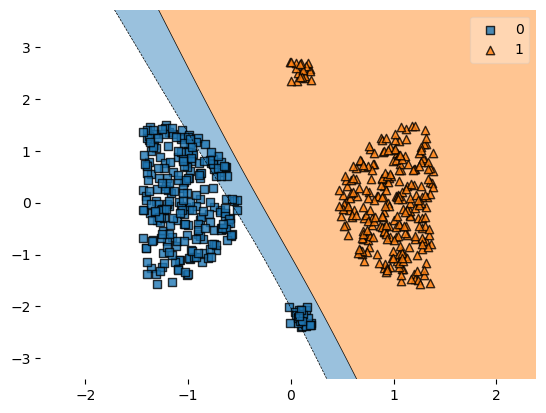

In [42]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 7s 726us/step


<AxesSubplot: >

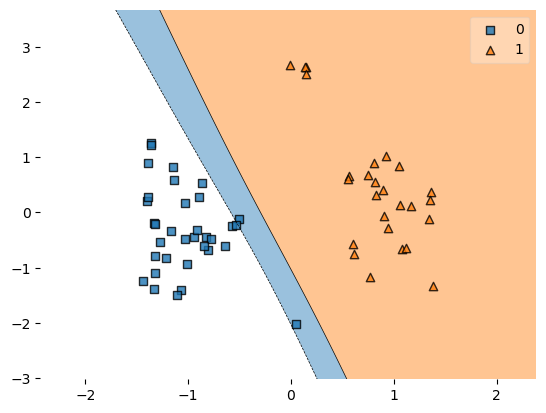

In [43]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the Relu activation func

In [44]:
model=Sequential()
model.add(Dense(5,activation="relu", input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="tanh"))

In [45]:
model.get_weights()

[array([[-0.9062998 ,  0.40245712, -0.6859896 ,  0.37040186, -0.08534873],
        [-0.34933317, -0.05641663, -0.55684483,  0.76071584,  0.5428555 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.1433829 , -0.46783656, -0.56565666, -0.27996075],
        [-0.4123552 , -0.50127   ,  0.65343356,  0.79611015],
        [ 0.2796359 , -0.5350996 , -0.19993061,  0.68254554],
        [-0.2781694 , -0.13972777, -0.47619367,  0.6307962 ],
        [-0.7722807 ,  0.7977984 ,  0.6408206 , -0.5005108 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.7296376 , -0.4485085 ],
        [-0.4022069 ,  0.11698747],
        [-0.9533129 , -0.96037245],
        [-0.47312832, -0.82538676]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.041519 ],
        [1.2430977]], dtype=float32),
 array([0.], dtype=float32)]

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 15        
                                                                 
 dense_8 (Dense)             (None, 4)                 24        
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 8.1143 - accuracy: 0.4745 - val_loss: 6.7127 - val_accuracy: 0.5648
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 8.1052 - accuracy: 0.4745 - val_loss: 6.7127 - val_accuracy: 0.5648
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 8.1052 - accuracy: 0.4745 - val_loss: 6.7127 - val_accuracy: 0.5648
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 8.1052 - accuracy: 0.4745 - val_loss: 6.7127 - val_accuracy: 0.5648
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 8.1052 - accuracy: 0.4745 - val_loss: 6.7127 - val_accuracy: 0.5648
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 8.1052 - accuracy: 0.4745 - val_loss: 6.7127 - val_accuracy: 0.5648
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 8.1052 - accuracy: 0.4745 - val_loss: 6.7127 - val_accuracy: 0.5648
Epoch 8/50
44/44 [==

In [49]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 1ms/step


array([[-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0.02896582],
       [-0

In [50]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.5666666666666667

In [52]:
val_loss = history.history['val_loss']
loss = history.history['loss']

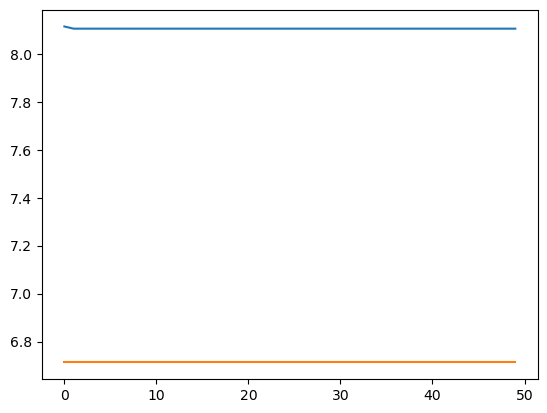

In [53]:
plt.plot(loss)
plt.plot(val_loss)

In [54]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 8s 828us/step


<AxesSubplot: >

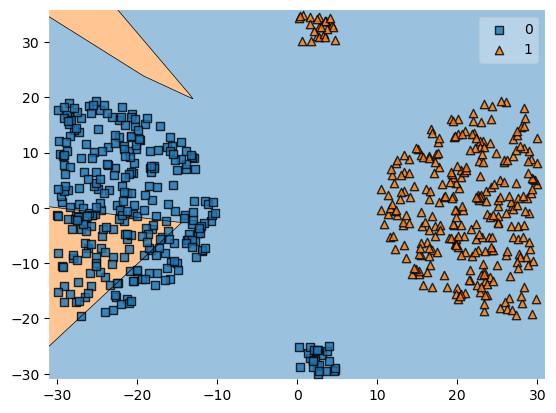

In [55]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 950us/step


<AxesSubplot: >

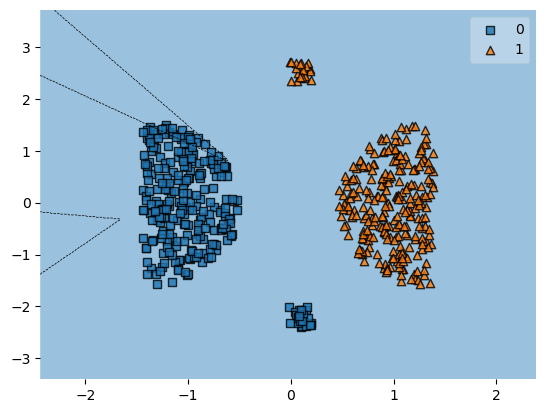

In [56]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 9s 903us/step


<AxesSubplot: >

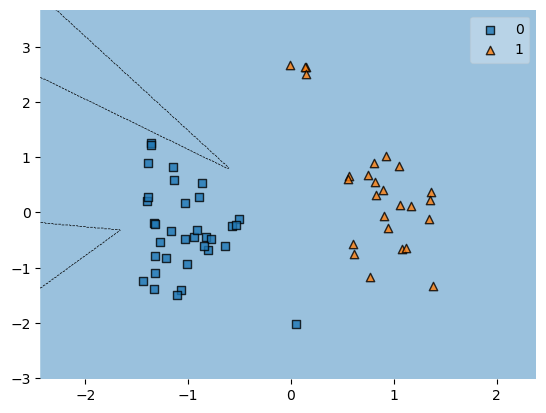

In [57]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### buliding the model with relu func

In [58]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="relu"))

In [59]:
model.get_weights()

[array([[-0.47163275,  0.67623544,  0.31402016,  0.3081596 , -0.3539948 ],
        [-0.27117413, -0.25011843, -0.67216337, -0.12304348,  0.64133334]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.80391216, -0.27309948, -0.70883197, -0.5444417 ],
        [ 0.06389803, -0.28213382,  0.09586519, -0.47644615],
        [-0.6703664 ,  0.45998156, -0.24068648, -0.48668548],
        [ 0.62858033,  0.7674595 ,  0.5588913 ,  0.57672   ],
        [-0.6982284 ,  0.5874131 ,  0.30744147, -0.5938089 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.20262122, -0.95567036],
        [-0.8750608 , -0.80652595],
        [ 0.58201337,  0.9452987 ],
        [-0.45546365, -0.16084456]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.2622429 ],
        [-0.32430816]], dtype=float32),
 array([0.], dtype=float32)]

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 15        
                                                                 
 dense_12 (Dense)            (None, 4)                 24        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 1s 7ms/step - loss: 2.2243 - accuracy: 0.4745 - val_loss: 1.3129 - val_accuracy: 0.5648
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 1.3251 - accuracy: 0.4745 - val_loss: 1.0314 - val_accuracy: 0.5648
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 1.0057 - accuracy: 0.4954 - val_loss: 0.6926 - val_accuracy: 0.6111
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.6968 - val_loss: 0.4565 - val_accuracy: 0.8056
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8588 - val_loss: 0.3580 - val_accuracy: 0.8889
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.9468 - val_loss: 0.2939 - val_accuracy: 0.9444
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.9583 - val_loss: 0.2579 - val_accuracy: 0.9537
Epoch 8/50
44/44 [==

In [63]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 2ms/step


array([[0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [1.8283336 ],
       [0.062728  ],
       [0.062728  ],
       [1.6680559 ],
       [1.5022632 ],
       [0.062728  ],
       [1.6944999 ],
       [0.062728  ],
       [1.542753  ],
       [0.062728  ],
       [1.1087092 ],
       [1.1787622 ],
       [0.062728  ],
       [1.0397714 ],
       [0.062728  ],
       [1.400198  ],
       [1.3345116 ],
       [2.110132  ],
       [0.062728  ],
       [1.7439672 ],
       [1.0612015 ],
       [0.062728  ],
       [1.7319148 ],
       [1.1017336 ],
       [0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [1.5815389 ],
       [0.062728  ],
       [0.062728  ],
       [2.1503375 ],
       [1.9696732 ],
       [1.6804594 ],
       [2.1446846 ],
       [0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [0.062728  ],
       [0.062

In [64]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.9333333333333333

In [66]:
val_loss = history.history['val_loss']
loss = history.history['loss']

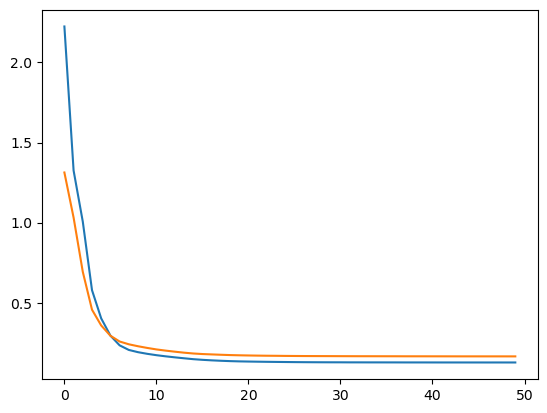

In [67]:
plt.plot(loss)
plt.plot(val_loss)

In [68]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 25s 3ms/step


<AxesSubplot: >

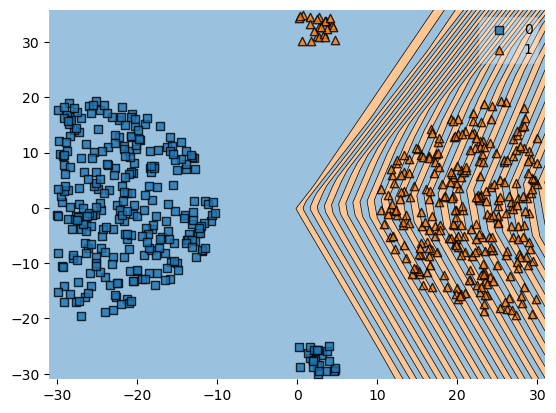

In [69]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 36s 4ms/step


<AxesSubplot: >

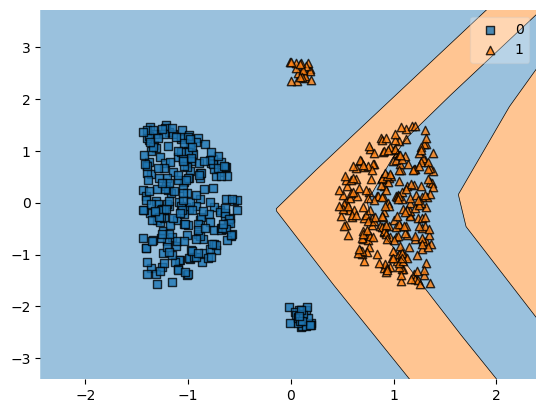

In [70]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 24s 3ms/step


<AxesSubplot: >

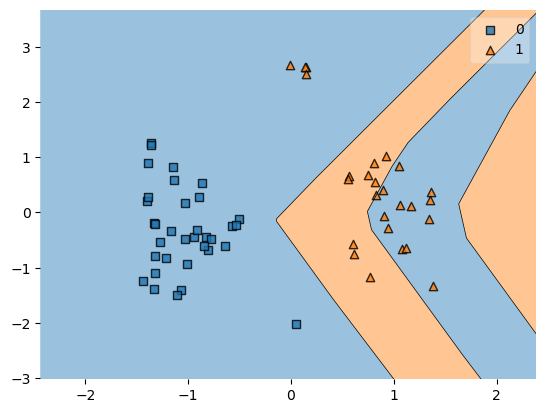

In [71]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

## relu and sigmoid

In [72]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [73]:
model.get_weights()

[array([[-0.74925977, -0.03571939, -0.1142382 , -0.4379551 , -0.64907295],
        [ 0.38919616,  0.16279125,  0.27029026, -0.10351992, -0.7648815 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.3485275 , -0.37625366, -0.7533985 , -0.12292349],
        [-0.31036305,  0.81223416, -0.6264664 ,  0.24163973],
        [ 0.18982542, -0.32711536, -0.7663449 ,  0.56902885],
        [ 0.4645704 , -0.62306345,  0.52325034, -0.19888896],
        [ 0.32431054,  0.05488861,  0.7650225 , -0.61759967]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.86769557,  0.2875042 ],
        [-0.37921548, -0.8314254 ],
        [-0.2980051 ,  0.758477  ],
        [-0.5912776 , -0.31252098]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.08977711],
        [ 0.08780098]], dtype=float32),
 array([0.], dtype=float32)]

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 dense_16 (Dense)            (None, 4)                 24        
                                                                 
 dense_17 (Dense)            (None, 2)                 10        
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='Rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 2s 10ms/step - loss: 0.6980 - accuracy: 0.4630 - val_loss: 0.6959 - val_accuracy: 0.4352
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5255 - val_loss: 0.6944 - val_accuracy: 0.4352
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5255 - val_loss: 0.6942 - val_accuracy: 0.4352
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5463 - val_loss: 0.6925 - val_accuracy: 0.5370
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.6644 - val_loss: 0.6866 - val_accuracy: 0.6759
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.7755 - val_loss: 0.6747 - val_accuracy: 0.7500
Epoch 7/50
44/44 [==============================] - 0s 6ms/step - loss: 0.6653 - accuracy: 0.8102 - val_loss: 0.6565 - val_accuracy: 0.7963
Epoch 8/50
44/44 [=

In [77]:
#SGD
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 0s/step


array([[1.4660650e-07],
       [6.8821947e-08],
       [1.5454813e-07],
       [4.1960498e-06],
       [5.8919296e-09],
       [8.4631616e-01],
       [2.9911140e-05],
       [1.5911342e-11],
       [8.4631616e-01],
       [8.4631616e-01],
       [8.2276208e-10],
       [8.4631616e-01],
       [2.2346200e-08],
       [8.4631616e-01],
       [2.6409029e-07],
       [8.4631616e-01],
       [8.4631616e-01],
       [8.4631616e-01],
       [8.4631616e-01],
       [8.4631616e-01],
       [8.4631616e-01],
       [8.4631616e-01],
       [8.4631616e-01],
       [1.2383867e-06],
       [8.4631616e-01],
       [8.4631616e-01],
       [3.2437732e-05],
       [8.4631616e-01],
       [8.4631616e-01],
       [1.7807136e-09],
       [3.0614775e-09],
       [1.2282939e-06],
       [8.4631616e-01],
       [4.6909761e-07],
       [8.4631616e-01],
       [8.4631616e-01],
       [1.0792913e-09],
       [8.4631616e-01],
       [8.4631616e-01],
       [8.4631616e-01],
       [8.4631616e-01],
       [6.603744

In [78]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

1.0

In [80]:
val_loss = history.history['val_loss']
loss = history.history['loss']

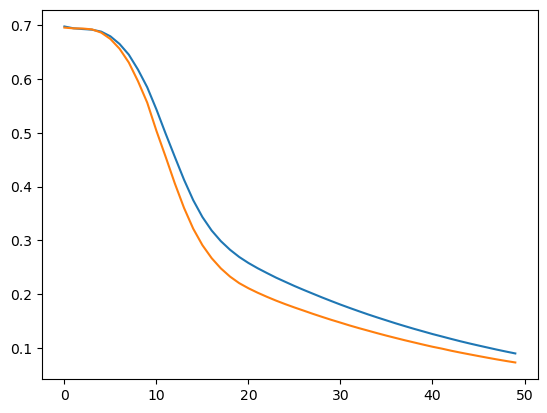

In [81]:
plt.plot(loss)
plt.plot(val_loss)

In [82]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 23s 2ms/step


<AxesSubplot: >

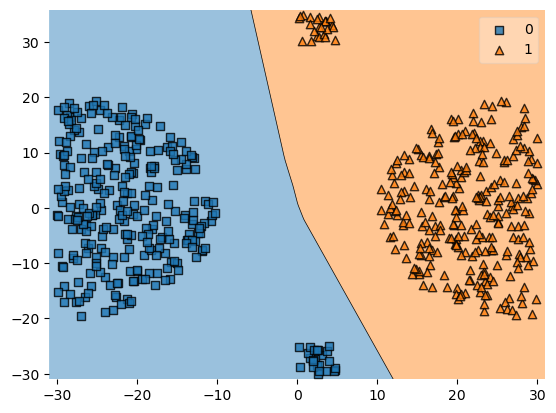

In [83]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 31s 3ms/step


<AxesSubplot: >

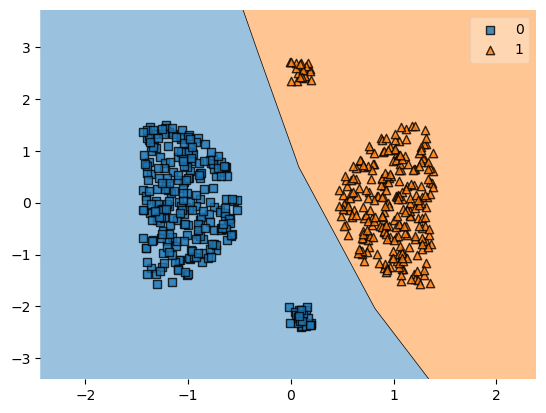

In [84]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 33s 3ms/step


<AxesSubplot: >

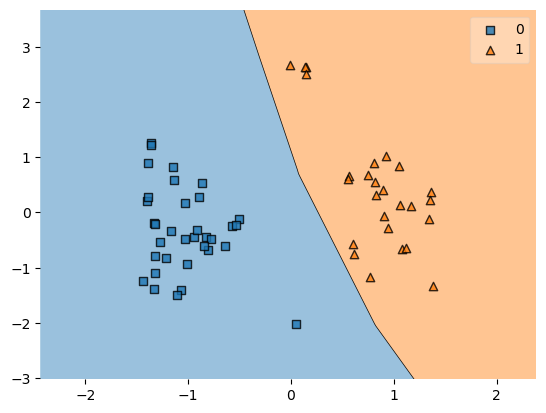

In [85]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)